In [12]:
# import Moduals and lib.
import Evaluation
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from matplotlib import style
from collections import Counter
import pickle
import random
from sklearn import metrics
style.use('fivethirtyeight')

## Preparing Data 

In [13]:
#  Load Feaure data
fil = open('n_GaussianRandomProjection.pickle', 'rb')
X = pickle.load(fil)
fil.close()

# Load  labels of this Feature
fil = open('n_y.pickle', 'rb')
Y = pickle.load(fil)
fil.close()
for i in range(len(Y)):
    if Y[i]  == 2:
        Y[i] = 0
    elif Y[i] == 4:
        Y[i] = 1

# split data into Train and Teast

x_train , x_test, y_train , y_test = train_test_split(X, Y,  test_size=0.4)


## Train and Test with SVM , KNN, Linear Regerassion,Kmeans

In [14]:
# implementing the k-nearest neighbors classifier
Knn_Cl = neighbors.KNeighborsClassifier(n_neighbors=3)
Knn_Cl.fit(x_train, y_train)

# prediction
Knn_y_pred_class = Knn_Cl.predict(x_test)

## Evaluate KNN

('Accuracy: ', 0.93928571428571428)
('Null Accuracy: ', 0.6642857142857144)
('TP :', 81)
('TN', 182)
('FP', 4)
('FN', 13)
('Misclassifier Rate :', 0.060714285714285714)
(' Sensitivity or recall rate :', 0.86170212765957444)
('Specificity: ', 0.978494623655914)
('FALSE Positive Rate: ', 0.021505376344086023)
('Precision: ', 0.95294117647058818)
0.96922900938


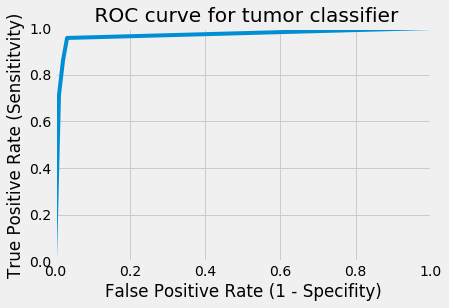

In [4]:
evaluation  = Evaluation.evaluation_fun (Knn_Cl, y_test, Knn_y_pred_class,x_test)
evaluation.Accuracy()
evaluation.Confusion_Matrix()
evaluation.ROC_Curves()


## SVM

In [15]:
# implementing the svm classifier
SVM_CL= svm.SVC(probability=True)
SVM_CL.fit(x_train,y_train)

# prediction
SVM_y_pred_class = SVM_CL.predict(x_test)
y_pred_prob = SVM_CL.predict_proba(x_test)[:, 1]

('Accuracy: ', 0.9464285714285714)
('Null Accuracy: ', 0.6535714285714286)
('TP :', 97)
('TN', 168)
('FP', 15)
('FN', 0)
('Misclassifier Rate :', 0.053571428571428568)
(' Sensitivity or recall rate :', 1.0)
('Specificity: ', 0.91803278688524592)
('FALSE Positive Rate: ', 0.081967213114754092)
('Precision: ', 0.8660714285714286)
0.980339135823


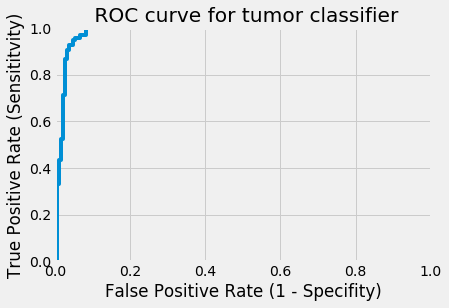

In [16]:
evaluation  = Evaluation.evaluation_fun (SVM_CL, y_test, SVM_y_pred_class, x_test)
evaluation.Accuracy()
evaluation.Confusion_Matrix()
evaluation.ROC_Curves()

## K-Means

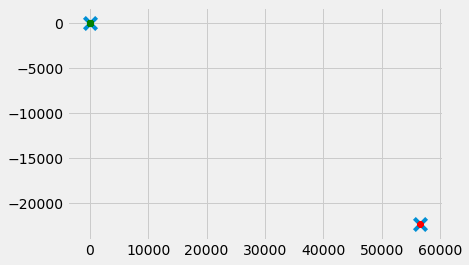

In [17]:
KM_CL =  KMeans(n_clusters =2)
KM_CL.fit(X)
centroids = KM_CL.cluster_centers_
labels = KM_CL.labels_

colors =10* ["g.", "r.","c.","b.","k."]

for i in range(len(X)):
    plt.plot(X[i][0] , X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0],centroids[:,1], marker='x', s=150, linewidths=5)
plt.show()

In [21]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1 , len(predict_me))
    #     print(predict_me)
    prediction = KM_CL.predict(predict_me)
    if prediction[0] == Y[i]:
        correct +=1
        
print(correct / float(len(X)))
evaluation  = Evaluation.evaluation_fun (LR_CL, y_test, LR_y_pred_class, x_test)
evaluation.Accuracy()
evaluation.Confusion_Matrix()

0.638054363376
('Accuracy: ', 0.94285714285714284)
('Null Accuracy: ', 0.6535714285714286)
('TP :', 88)
('TN', 176)
('FP', 7)
('FN', 9)
('Misclassifier Rate :', 0.057142857142857141)
(' Sensitivity or recall rate :', 0.90721649484536082)
('Specificity: ', 0.96174863387978138)
('FALSE Positive Rate: ', 0.03825136612021858)
('Precision: ', 0.9263157894736842)


## LinearRegression

In [19]:
LR_CL =  LinearRegression()

LR_CL.fit(x_train, y_train)
# with open('linerregression.pickle','wb') as f:
#     pickle.dump(clf, f)
# pickle_in = open('linerregression.pickle', 'rb')    
# clf = pickle.load(pickle_in)
LR_y_pred_class = Knn_Cl.predict(x_test)

In [20]:
evaluation  = Evaluation.evaluation_fun (LR_CL, y_test, LR_y_pred_class, x_test)
evaluation.Accuracy()
evaluation.Confusion_Matrix()
# evaluation.ROC_Curves()

('Accuracy: ', 0.94285714285714284)
('Null Accuracy: ', 0.6535714285714286)
('TP :', 88)
('TN', 176)
('FP', 7)
('FN', 9)
('Misclassifier Rate :', 0.057142857142857141)
(' Sensitivity or recall rate :', 0.90721649484536082)
('Specificity: ', 0.96174863387978138)
('FALSE Positive Rate: ', 0.03825136612021858)
('Precision: ', 0.9263157894736842)


In [11]:
#  Combining Algos with a Vote

from nltk.classify import ClassifierI
from statistics import mode
import nltk
class VoteClassifier(ClassifierI):
    def __init__ (self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        choice_votes = votes.count(mode(votes))
        print(choice_votes)
        conf = float(choice_votes) / len(votes)
        return conf

voted_classifier =  VoteClassifier(Knn_Cl, SVM_CL, KM_CL)
print(" Voted_classifier  accuracy percent", (nltk.classify.accuracy(voted_classifier, x_test)) *100)
print("Classification :", voted_classifier.classify(x_test[0][0]), "confidence %:", float(voted_classifier.confidence(x_test[0][0])*100))
print("Classification :", voted_classifier.classify(x_test[1][0]), "confidence %:", float(voted_classifier.confidence(x_test[1][0])*100))
print("Classification :", voted_classifier.classify(x_test[2][0]), "confidence %:", float(voted_classifier.confidence(x_test[2][0])*100))
print("Classification :", voted_classifier.classify(x_test[3][0]), "confidence %:",float( voted_classifier.confidence(x_test[3][0])*100))
print("Classification :", voted_classifier.classify(x_test[4][0]), "confidence %:", float(voted_classifier.confidence(x_test[4][0])*100))
print("Classification :", voted_classifier.classify(x_test[5][0]), "confidence %:", float(voted_classifier.confidence(x_test[5][0])*100))

ValueError: too many values to unpack